# XOR Prediction Neural Network

### XOR GATE ийг сурсан неорал сүлжээ

XOR GATE бол бодит тоо нь утгууд нь хоорондоо ялгаатай үед 1 эсвэл түүнээс дээш гаргадаг дижитал логик хаалга.

**Жишээ нь:**

> **A** нь **0** бас **B** нь **0** бол хариу нь **0**, харин **А** нь **0** байхад **Б** нь **1** бол хариу нь **1** байх гэх мэт

<img src="https://lh3.google.com/u/0/d/104S8bTuA1g2xKB5IWQfqB2Ea6iupHiQD=w2880-h1642-iv1" />

Тэгвэл бид энэхүү XOR Gate ийг неорал сүлжээ ашиглан сургаж үзэцгээе.

## Excel дээр сургасан жишээ:

* [XOR - NeuralNetwork with Activation](https://drive.google.com/open?id=1K1MjFq1Qsi7aoxRuQy3ox5gYyQvGFX4u7O98AsKuCbo)
* [XOR - NeuralNetwork without Activation](https://docs.google.com/spreadsheets/d/18bA51mM32zvYZD88KESiQk1zW0NhoxxAFF75NHBF7y4/edit?usp=sharing)

## Neural Network дэлгэрэнгүй

- Input Layer Units = 2 (Мэдээж хэдэн ч оролттой болгож болно)
- Hidden Layer Units = 2 (Өөрчилж болно)
- Output Layer Units = 1 (Гол зорилго маань input орж ирж байгаа утгууд ялгаатай үед 1 харин ижил үед 0 гаргах хэрэгтэй болхоор зөвхөн нэгхэн хариу гаргаж өгөх хэрэгтэй)
- No. of hidden layers = 1
- Algorithm: **Backpropagation**

<img src="https://lh3.google.com/u/0/d/1T7X5-E937Ib_GsB6JGGHvLqXaaR1OYfh=w2880-h1016-iv1" width="500px"/>

In [0]:
!pip install numpy
!pip install matplotlib

In [0]:
import numpy as np # Матриц дээр математикийн үйлдлүүд хийхийн тулд
import matplotlib.pyplot as plt # Дүрсэлж харуулхад хэрэглэгддэг сан
import sys # For printing

In [0]:
# Сургалтын өгөгдөл
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
# Сургалтын өгөгдлийн зорилгот хариу
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [0]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [0]:
y

array([[0],
       [1],
       [1],
       [0]])

### Нэмэлт параметерс

Зөвхөн weight ийн хэмжээг тодорхойлход ашиглагдаж байгаа

In [0]:
num_i_units = 2 # Number of Input units
num_h_units = 2 # Number of Hidden units
num_o_units = 1 # Number of Output units

### Weights and Biases

NN -ыг нарийвлал сайн таахад хэрэгтэй тоонууд


Оролтын давхаргаас далд давхаргад холбохын тулд weight ба bias утгыг дараах дарааллаар байрлуулна: **оролтын нэгж бүр hidden нэгж тус бүртэй холбогдсон weight агуулна**. Дараа нь эдгээр weight -ийн олонлог хэлбэр нь: **hidden layer -ын нэгж тоо X оролтын өгөгдлийн нэгж тоо** ба bias -ын хэлбэр нь: **hidden layer -ын нэгжийн тоо X 1** байна.

Тиймээс weight болон bias хэлбэр нь доорх хэлбэртэй байна

**Weights1(Connection from input to hidden layers)**: num_h_units X num_i_units **Biases1(Connection from input to hidden layers)**: num_h_units X 1

**Weights2(Connection from hidden to output layers)**: num_o_units X num_h_units **Biases2(Connection from hidden to output layers)**: num_o_units X 1

### Weight -үүдэд анхны утгыг оноох нь

Weight -үүдээ рандомоор үүсгэхдээ  [Normal Distribution(Gaussian Distribution)](http://mathworld.wolfram.com/NormalDistribution.html) арга ашигласан. Мөн эдгээр weight seed хийгдсэн бөгөөд дахин ажилуулхад ижил үүсгэж өгөх юм.

In [0]:
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 2x2
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2

B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

In [0]:
W1

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862]])

In [0]:
W2

array([[ 0.86540763, -2.3015387 ]])

In [0]:
B1

array([[0.41919451],
       [0.6852195 ]])

In [0]:
B2

array([[0.20445225]])

### Sigmoid Function

Энэ функц нь оролтын утгыг 0 ээс 1 хооронд өөрчилж өгдөг шугаман бус функц юм

<img src="https://lh3.google.com/u/0/d/1igtoHfPFZxPaU6oPtuKeYyDrxNNatqko=w2880-h1642-iv1"/>

Sigmoid activation function хэрэглэх тул хялбар байдлаар функц болгож бичлээ. Мөн derv parameter утга true үед sigmoid авсан утга оруулахад сигмойдын уламжлалыг гаргана.

In [0]:
def sigmoid(z, derv=False):
    if derv: return z * (1.0 - z)
    return 1.0 / (1.0 + np.exp(-z))

### Neuron сүлжээний хайпер параметерс

NN-ын шууд хэрэглэгдэх параметерууд

In [0]:
# The learning rate for Gradient Descent.
learning_rate = 0.1

# Maximum iterations for Gradient Descent.
max_iter = 10000

# Number of training examples
m = 4

### Training (Сургалт)

Суртгалт нь Forward propagation ба [Backpropagation](http://neuralnetworksanddeeplearning.com/chap2.html) гэх хоёр хэсгээс бүрдэнэ.

### Forward Propagation

Хэрхэн prediction хийгдэж байгааг [энд](https://en.wikipedia.org/wiki/Feedforward_neural_network)ээс харна уу .

2 хэмжээст векторыг 2x1 хэмжээст матрикс болгоно. Predict boolean хувьсагч утга true байвал зөвхөн predict хйинэ харин false байвал бүх layer ийн гаралтыг буцаана.

In [0]:
def forward(x, W1, W2, B1, B2,predict=False):
    X0 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z1 = W1.dot(X0) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a1 = sigmoid(z1) # 2x1

    z2 = W2.dot(a1) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a2 = sigmoid(z2)

    if predict: return a2
    return (X0, a1, a2)

### Backpropagation

Сүүлйин гаралтын pred - утгаас алдааг тооцож, тооцсон алдаанаас тухайн weight, bias-н утгыг аль чиглэл рүү өөрчлөхөө chain rule, уламжлал ашиглан олж тухайн чиглэл рүү learning rate-ээр ашиглан өөрчилнө.


Бидний NN-ын backpropagation алхамууд:

1. a2 буюу гаралтын pred утга хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? da2 = dL/da2
2. z2 өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dz2 = dL/da2 * da2/dz2.
3. W2 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dW2 = dL/dz2 * dz2/dW2.
4. a1 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? da1 = dL/dz2 * dz2/da1
5. z1 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ?. dz1 = dL/da1 * da1/dz1
6. W1 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dW1 = dL/dz1 * dz1/dw1
7. B1 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dB1 = dL/dz1 * dz1/dB1
7. B2 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dB1 = dL/dz2 * dz2/dB2

Gradient бодсоны дараа W1, W2, B1, B2 -уудыг өөрчлөхдөө тухайн уламжлалыг(Positive gradient or Negative gradient)ашиглан learning_rate-ээр үржих буюу гарж ирсэн чиглэл рүү алхана.

- W2 update хийхдээ W2' := W2 - (learning_rate * dW2)
- W1 update хийхдээ W1' := W1 - (learning_rate * dW1)
- B2 update хийхдээ B2' := B2 - (learning_rate * dB2)
- B1 update хийхдээ B1' := B1 - (learning_rate * dB1)

**Жишээ нь:** W2 ын gradient нь нэмэх гарвал энэ нь бид параболын баруун талд байна гэсэн үг тиймээс голрүү дөхөхийн тулд W2 - (learning_rate * dW2) буюу weight-г learning_rate ээр бууруулна гэсэн үг болж байгаа юм.

Эсрэгээрээ gradient хасах гарж байна гэдэг нь бид параболын зүүн талд байгаа гэсэн үг болж голруу дөхөхийн тулд W2 - (learning_rate * (**-** dW2)) буюу W2 + (learning_rate * dW2) болж weight-ыг нэмэх юм.

<img src="https://lh3.google.com/u/0/d/1l8wR9z7Oo9SA-tBMkrVojbCs1A4ID0vc=w2880-h1642-iv1" />

<img src="https://lh3.google.com/u/0/d/1MviIaN8DI37JSgcsS77B0Sm1iGjJojDz=w2880-h1544-iv1" width="500px">

In [0]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    costs = []
    for i in range(max_iter):
        sys.stdout.flush() # Updating the text.
        L = 0
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        for j in range(m):
            # Forward prop
            X0, a1, a2 = forward(X[j], _W1, _W2, _B1, _B2)
            # -(ylog(pred)+(1-y)log(1-pred))
            L = L + (-(y[j] * np.log(a2) + ((1 - y[j]) * np.log(1 - a2))))
            # Backward
            # a2 буюу гаралтын pred утга хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? da2 = dL/da2
            da2 = (a2 - y[j])/sigmoid(a2, derv=True)
            # z2 өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dz2 = dL/da2 * da2/dz2 = da2 * a2'. (a2' буюу a2 бол сигмойд гарж ирсэн үр дүн болхоор сигмойдын уламжлал авна)
            dz2 = da2 * sigmoid(a2, derv=True)
            # w2 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dLw2 = dz2 * dz2/dw2 = dz2 * ((a1 * W2 + B2)/dW2) =  dz2 * a1
            dW2 += np.multiply(dz2, a1.T)
            # B2 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dLb2 = dz2 * dz2/db2 = dz2 * ((a1 * W2 + B2)/dW2) =  dz2 * 1
            dB2 += dz2
            # a1 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dLa1 = dz2 * dz2/da1 = dz2 * ((a1 * W2 + B2)/da1) = dz2 * W2
            da1 = np.multiply(dz2, _W2.T)
            # z1 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ?. dLz1 = da1 * da1/dz1 = da1 * a1' = (a1' буюу a1 бол сигмойд гарж ирсэн үр дүн болхоор сигмойдын уламжлал авна)
            dz1 = np.multiply(da1, sigmoid(a1, derv=True))
            # w1 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dLw1 = dz1 * dz1/dw1 = dz1 * ((X * W1 + B1)/dW1) = dz1 * X
            dW1 += dz1.dot(X0.T)
            # B1 хэрхэн өөрчлөгдөхөд Loss яаж өөрчлөгдөх вэ? dLb1 = dz1 * dz1/db2 = dz1 * ((X * W1 + B1)/dB1) = dz1 * 1
            dB1 += dz1
            
        _W2 = _W2 - (learning_rate * (dW2/m))
        _B2 = _B2 - (learning_rate * (dB2/m))
        _W1 = _W1 - (learning_rate * (dW1/m))
        _B1 = _B1 - (learning_rate * (dB2/m))
        costs.append((L/m).reshape(-1))
        sys.stdout.write("\rIteration: {} and {}".format(i + 1, costs[-1]))
    return _W1, _W2, _B1, _B2, costs

In [0]:
W1, W2, B1, B2, costs = train(W1, W2, B1, B2)

Iteration: 10000 and [0.0561709]

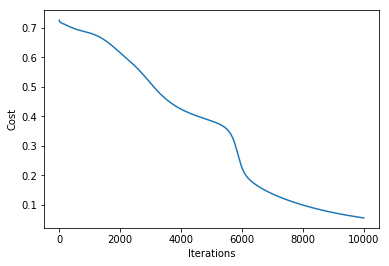

In [0]:
plt.plot(range(max_iter), costs)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

In [0]:
print(X[1])
print(y[1])

[0 1]
[1]


In [0]:
forward(X[1], W1, W2, B1, B2, predict=True)[0][0]

0.947048888909766